In [1]:
import numpy as np

In [244]:
def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [386]:
class CNN:
    
    def __init__(self , n_f , filter_F = 3 , stride = 1 , padding = 'valid'):
        
        self.filter = None
        self.padding = padding
        self.stride = stride
        self.n_f = n_f
        self.filter_F = filter_F
    
    def Forward_pass(self,input_X):
        
        padding = self.padding
        stride = self.stride
        n_f = self.n_f 
        filter_F = self.filter_F
    
        m = input_X.shape[0]
        f = filter_F
        filt = np.random.normal(size=(n_f,f,f))
        
        if(padding == 'same'):
            p = int((m*(stride - 1) - stride + f)/2)

            input_X = np.pad(input_X , ((p,p),(p,p),(0,0)))
        else: p=0

        o_m = int(((m-f+2*p)/stride) + 1)
        m = input_X.shape[0]

        output_X = np.zeros((n_f,o_m,o_m))
        i=0
        j=0

        for k in range(n_f):
            dummy = np.zeros((3,filt[k].shape[0],filt[k].shape[1]))
            dummy[0] = filt[k]
            dummy[1] = filt[k]
            dummy[2] = filt[k]
            dummy = np.moveaxis(dummy,0,-1)
            for row in range(0,o_m,stride):
                for col in range(0,o_m,stride):
                    img = input_X[row:row+f,col:col+f,:]
                    output_X[k][i][j] = np.sum(np.multiply(img,dummy))

#                     if output_X[k][i][j]>255:
#                         output_X[k][i][j] = 255
#                     elif output_X[k][i][j]<0:
#                         output_X[k][i][j] = 0

                    j = j+1

                i = i+1
                j = 0
            i = 0
            
        self.filter = filt
        
        print(input_X.shape,filt.shape,output_X.shape)
        return output_X
    
    
    def Backward_pass(self,dl_do,input_X):
        
        filt = self.filter
        padding = self.padding
        stride = self.stride
        n_f = self.n_f 
        filter_F = self.filter_F
        
        m = input_X.shape[0]
        f = dl_do.shape[1]
        
        if(self.padding == 'same'):
            p = int((m*(stride - 1) - stride + f)/2)

            input_X = np.pad(input_X , ((p,p),(p,p),(0,0)))
        else: p=0

        o_m = int(((m-f+2*p)/stride) + 1)
        m = input_X.shape[0]

        dl_df = np.zeros(filt.shape)
        i=0
        j=0

        for k in range(n_f):
            dummy = np.zeros((3,dl_do[k].shape[0],dl_do[k].shape[1]))
            dummy[0] = dl_do[k]
            dummy[1] = dl_do[k]
            dummy[2] = dl_do[k]
            dummy = np.moveaxis(dummy,0,-1)
            for row in range(0,o_m,stride):
                for col in range(0,o_m,stride):
                    img = input_X[row:row+f,col:col+f,:]
                    dl_df[k][i][j] = np.sum(np.multiply(img,dummy))

#                     if dl_df[k][i][j]>255:
#                         dl_df[k][i][j] = 255
#                     elif dl_df[k][i][j]<0:
#                         dl_df[k][i][j] = 0

                    j = j+1

                i = i+1
                j = 0
            i = 0


        rot_filt = np.flip(np.flip(filt,axis=0),axis=1)

        print(dl_do.shape,dl_df.shape,input_X.shape)
        return dl_df
    

In [387]:
x = np.random.randn(3,10,10)
x = np.moveaxis(x,0,-1)

In [388]:
f = 3
n_f = 16
model = CNN(n_f=n_f,filter_F=f,padding='valid')
o = model.Forward_pass(input_X=x)

(10, 10, 3) (16, 3, 3) (16, 8, 8)


In [389]:
oo = model.Backward_pass(input_X=x,dl_do=o)

(16, 8, 8) (16, 3, 3) (10, 10, 3)


In [411]:
#print(oo)

In [240]:
o.shape

(128, 222, 222)

In [391]:
import cv2
img_ = cv2.imread('./296.jpg')
img_ = cv2.resize(img_,(100,100))
img_ = cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
#img_ = cv2.cvtColor(img_,cv2.COLOR_RGB2GRAY)

In [402]:
f = 3
n_f = 32
model = CNN(n_f=n_f,filter_F=f,padding='valid')
o = model.Forward_pass(input_X=img_)

(100, 100, 3) (32, 3, 3) (32, 98, 98)


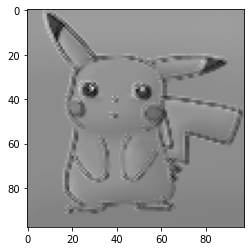

In [414]:
plt.imshow(o[31],cmap='gray')